# Latihan Membuat Model Klasifikasi Gambar

## Tujuan
Tahap awal sebelum kita membangun sebuah model machine learning adalah mendefinisikan problem statement yang ingin kita selesaikan. Pada tahap ini kita menentukan apa masalah yang ingin diselesaikan dan bagaimana implementasi dari model jaringan saraf tiruan dapat menyelesaikan masalah tersebut. Setelah kita memahami masalah, kita dapat mengembangkan model jaringan saraf tiruan sebagai sebuah solusi.

## Tahapan Latihan

Tentunya machine learning selalu membutuhkan data. Pada tahap awal kita perlu memahami dataset yang kita miliki terlebih dahulu. Beberapa hal yang perlu diketahui adalah format dari data, jumlah sampel, dan berapa jumlah label. Selain itu, kita juga perlu memastikan apakah dataset tersebut merupakan data kontinu (masalah regresi) atau data diskrit (masalah klasifikasi).

Dataset yang kita gunakan memiliki 192 sampel data latih yang terdiri dari 96 sampel gambar ruangan rapi dan 96 sampel gambar ruangan berantakan.

Tahapan latihan kali ini adalah:

1. Memastikan TensorFlow yang digunakan di Google Colab adalah versi di atas 2.0.
2. Mengunduh dataset dan melakukan extract file dengan metode unzip.
3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
4. Pre-processing data dengan image augmentation.
5. Mempersiapkan data latih yang akan dipelajari oleh model.
6. Membangun arsitektur model dengan Convolutional Neural Network (CNN).
7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.

In [1]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-12-02 10:16:46--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2023-12-02 10:16:46--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  --.-KB/s    in 0.1s    

2023-12-02 10:16

In [3]:
# Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [6]:
# # Membuat direktori ruangan rapi pada direktori data training
# train_clean_dir = os.path.join(train_dir, 'clean')

# # Membuat direktori ruangan berantakan pada direktori data training
# train_messy_dir = os.path.join(train_dir, 'messy')

# # Membuat direktori ruangan rapi pada direktori data validasi
# validation_clean_dir = os.path.join(validation_dir, 'clean')

# # Membuat direktori ruangan berantakan pada direktori data validasi
# validation_messy_dir = os.path.join(validation_dir, 'messy')

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 16s - loss: 0.7623 - accuracy: 0.5500 - val_loss: 0.6906 - val_accuracy: 0.5000 - 16s/epoch - 650ms/step
Epoch 2/25
25/25 - 1s - loss: 0.6954 - accuracy: 0.4800 - val_loss: 0.6905 - val_accuracy: 0.7500 - 979ms/epoch - 39ms/step
Epoch 3/25
25/25 - 1s - loss: 0.6584 - accuracy: 0.6400 - val_loss: 1.1677 - val_accuracy: 0.5500 - 1s/epoch - 41ms/step
Epoch 4/25
25/25 - 2s - loss: 0.7222 - accuracy: 0.5200 - val_loss: 0.6650 - val_accuracy: 0.5500 - 2s/epoch - 61ms/step
Epoch 5/25
25/25 - 2s - loss: 0.6444 - accuracy: 0.5800 - val_loss: 0.5756 - val_accuracy: 0.6500 - 2s/epoch - 69ms/step
Epoch 6/25
25/25 - 1s - loss: 0.5813 - accuracy: 0.7100 - val_loss: 0.4322 - val_accuracy: 0.7500 - 1s/epoch - 41ms/step
Epoch 7/25
25/25 - 1s - loss: 0.5434 - accuracy: 0.7100 - val_loss: 0.5305 - val_accuracy: 0.7000 - 988ms/epoch - 40ms/step
Epoch 8/25
25/25 - 1s - loss: 0.5299 - accuracy: 0.7600 - val_loss: 0.5166 - val_accuracy: 0.7000 - 984ms/epoch - 39ms/step
Epoch 9/25
25/25 - 1

Saving cleanroom-big.jpg to cleanroom-big.jpg
1/1 [==============================] - 0s 240ms/step
cleanroom-big.jpg
clean


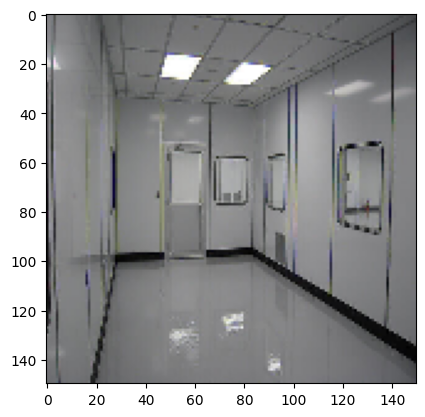

In [13]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
   print('messy')
  else:
   print('clean')